In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.pyplot import cm

In [2]:
import assaytools

In [3]:
from assaytools import platereader

In [4]:
filenames = [
    'p38_Bos_conc0_20180320_165318.xml',
    'p38_Bos_conc1_20180320_175851.xml', 
    'p38_Bos_conc2_20180320_185924.xml', 
    'p38_Bos_conc3_20180320_195957.xml',
    'p38_Bos_conc4_20180320_210030.xml',
    'p38_Bos_conc5_20180320_220105.xml', 
    'p38_Bos_conc6_20180320_230144.xml', 
    'p38_Bos_conc7_20180321_000222.xml',
    'p38_Bos_conc8_20180321_010326.xml', 
    'p38_Bos_conc9_20180321_020406.xml',
    'p38_Bos_conc10_20180321_030440.xml', 
    'p38_Bos_conc11_20180321_040513.xml', 
    'p38_Bos_conc12_20180321_050547.xml', 
    'p38_Bos_conc13_20180321_060625.xml', 
    'p38_Bos_conc14_20180321_070659.xml', 
    'p38_Bos_conc15_20180321_080736.xml', 
    'p38_Bos_conc16_20180321_090811.xml',
]
datapath = '20180320_testing_imidazole_spectra_reads'

In [5]:
concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06,
         2.48263378e-06,   4.18255821e-06,   7.04646547e-06,
         1.18713651e-05,   2.00000000e-05])


In [6]:
reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)

/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/albaness/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


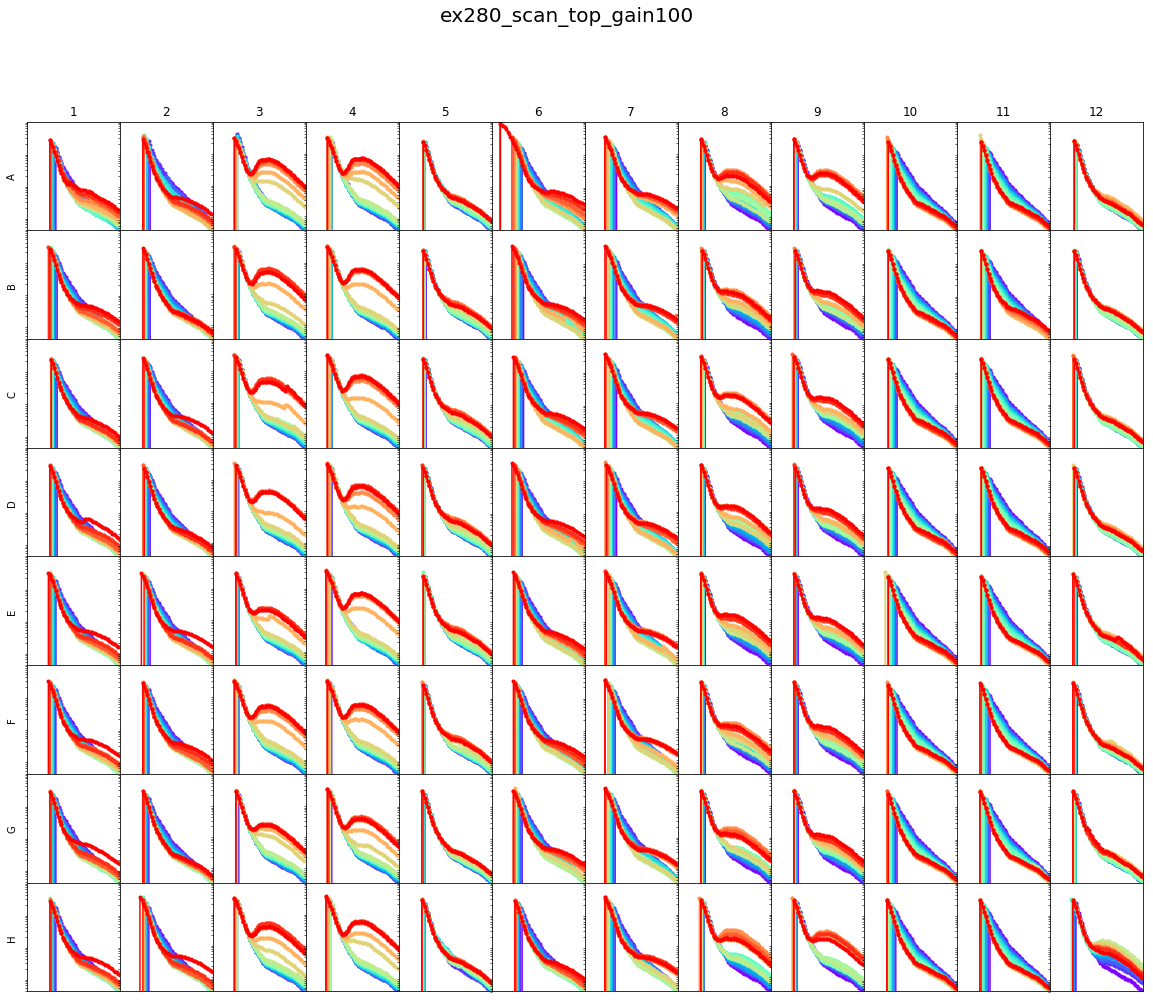

In [7]:
fig = plt.figure(figsize=[20,16])
nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'
data = np.zeros([nrows, ncols, nreads, 65], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = [list(reads[i][label][well].values()) for i in range(nreads)] 
        for i in range(nreads):
            measurements[i] = [x if x != 'OVER' else 0.0 for x in measurements[i]]
        data[row_index,col_index,:] = np.array(measurements)

        
ymax = data.max().max().max()
xmax = max(list(reads[0][label][well].keys()))
xmin = min(list(reads[0][label][well].keys()))
           
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        plt.subplot(nrows,ncols,index+1)
        well = row + col
        color=cm.rainbow(np.linspace(0,1,17))
        for read, c in zip(data[row_index,col_index,:], color):
            plt.semilogy(x_values, read, c=c, marker='.');
        #plt.semilogy(x_values, data[row_index,9,:], 'b.', alpha=.5);
        #plt.semilogy(x_values, data[row_index,10,:], 'y.', alpha=0.5);
        plt.axis([xmin, xmax, 0, ymax])
        plt.xticks([]);
        plt.yticks([]);
        if row_index == 0:
            plt.title(col);
        if col_index == 0:
            plt.ylabel(row);
        index += 1
        
plt.suptitle(label, fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('bos_spectra_imidazole_%s_logy.pdf' % label, dpi=500)

![image.png](./plate_layout.png)


In [27]:
x_values.index('480')

40

Text(0.5,1,'p38 + imidazole at 500 nm')

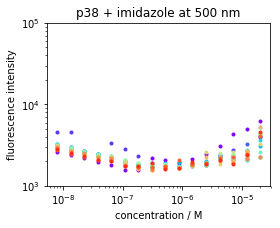

In [56]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in range(nrows):
    for column in [0,1]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
    plt.ylim(1000, 100000)
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('p38 + imidazole at %s nm' % wavelength)

Text(0.5,1,'p38 at 500 nm')

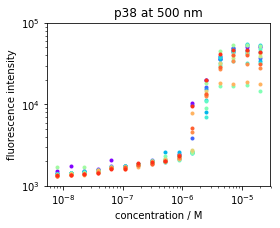

In [54]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in range(nrows):
    for column in [2,3]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('p38 at %s nm' % wavelength)

Text(0.5,1,'Boiled p38 at 500 nm')

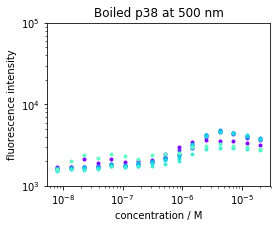

In [55]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in range(nrows):
    for column in [4]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('Boiled p38 at %s nm' % wavelength)

Text(0.5,1,'Abl + Imidazole at 500 nm')

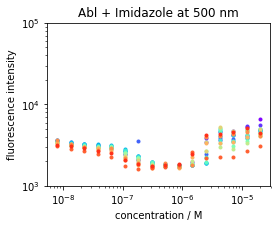

In [57]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in range(nrows):
    for column in [5,6]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('Abl + Imidazole at %s nm' % wavelength)

Text(0.5,1,'Abl at 500 nm')

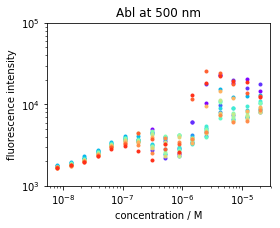

In [65]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in range(nrows):
    for column in [7, 8]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('Abl at %s nm' % wavelength)

Text(0.5,1,'Buffer + Imidazole 500 nm')

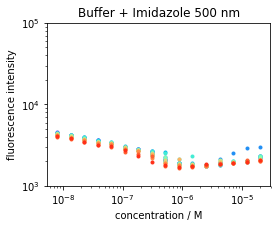

In [60]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in range(nrows):
    for column in [9, 10]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('Buffer + Imidazole %s nm' % wavelength)

Text(0.5,1,'Buffer 500 nm')

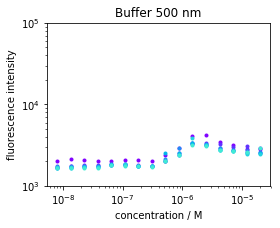

In [63]:
plt.figure(figsize=[4,3]);

color=cm.rainbow(np.linspace(0,1,17))
colorindex = 0
wavelength = '500'
for row in range(nrows -1): # nrows -1 because the last well in this column is the priming well 
    for column in [11]:
        plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=color[colorindex], marker='.', linestyle='None')
        colorindex += 1
plt.ylim(1000, 100000)
plt.xlabel('concentration / M');
plt.ylabel('fluorescence intensity');
plt.title('Buffer %s nm' % wavelength)